In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.util import prompt_for_user_token
import os

In [2]:
cid = '732fb417e5a04ad6849fe4338de5859f'
user_name = 'jayzzhang'
shared_secret = '3b23e61779474fe384aba5cd7053217'
ruri = 'http://localhost:8001/callback'
scopes = 'user-library-read'
path = 'data/'
os.chdir(path) 
print('Enter an updated authorization token: ')
token = input()

Enter an updated authorization token: 
BQAZghmElPtTGrCV_jsJa6of6w7gBKfuEVVNLSgiANxc9obT2NVhdY1Qh4RRue_7_tYvwmTvzeIDo8zhwflCiGqhG3MDdyRAlyE-MUiU4n6ZqgcajzHNU7OVNqg6IKo55shMmp6IvfRqnadFIaWzzTuf5mlDhNSlRB8C2XEuloTS4a1ikAJK0qMQt5vGjNaZ34b-QQ


In [3]:
sp = spotipy.Spotify(auth = token)
results1 = sp.current_user_saved_tracks(limit=1,offset=0)
total = results1['total']

In [4]:
saved_tracks=[]
saved_time = []
albums = []
artists = []
artist_ids = []
duration = []
explicit = []
popularity = []
track_name = []
track_ids = []
album_type = []
album_ids = []
artists_list = []
audio_features = []
artist_names = []
following = (artists_list)
saved_artist_name = []
genres = []
artist_popularity = []
artist_followers = []

## Function definitions for grabbing necessary data

In [5]:
##gets all saved tracks + time saved
def get_tracks():
    offset1 = 0

    while offset1 < total:
        lim = min(50,total-offset1)
        results = sp.current_user_saved_tracks(limit=lim,offset=offset1)
        for i in range(lim):
            saved_tracks.append(results['items'][i]['track']['id'])
            saved_time.append(results['items'][i]['added_at'])
        offset1 = offset1+lim

In [6]:
#get all track details
def get_track_details():
    track_offset = 0
    
    while track_offset < total:
        lim = min(50, total-track_offset)
        r1 = sp.tracks(saved_tracks[track_offset:track_offset+lim])
        for j in range(lim):
            albums.append(r1['tracks'][j]['album']['name'])
            album_ids.append(r1['tracks'][j]['album']['id'])
            artists.append(r1['tracks'][j]['album']['artists'][0]['name'])
            duration.append(r1['tracks'][j]['duration_ms'])
            explicit.append(r1['tracks'][j]['explicit'])
            popularity.append(r1['tracks'][j]['popularity'])
            track_ids.append(r1['tracks'][j]['id'])
            track_name.append(r1['tracks'][j]['name'])
            album_type.append(r1['tracks'][j]['album']['album_type'])
            artist_ids.append(r1['tracks'][j]['album']['artists'][0]['id'])
            artists_list.append(r1['tracks'][j]['album']['artists'])
        track_offset = track_offset+ lim
artist_list = list(set(artist_ids))

In [7]:
def get_track_features():
    feature_offset = 0

    while feature_offset < total:
        lim = min(100,total-feature_offset)
        r3 = sp.audio_features(track_ids[feature_offset:feature_offset+lim])
        for j in range(len(r3)):
            audio_features.append(r3[j])
        feature_offset = lim + feature_offset

In [8]:
def get_artists():

    for j in range(len(artists_list)):
        artist_sublist = []

        for k in range(len(artists_list[j])):
            artist_sublist.append(artists_list[j][k]['name'])
        artist_names.append(artist_sublist)

In [9]:
#saved artist data
def get_saved_artists():
    artist_offset = 0

    while artist_offset < total:
        lim = min(50,total-artist_offset)
        r4 = sp.artists(artist_ids[artist_offset:artist_offset+lim])
    
        for j in range(lim):
            genres.append(r4['artists'][j]['genres'])
        artist_offset += lim

## Data retrieval and formating

In [10]:
get_tracks() #creates saved_track and saved_track_time arrays
get_track_details() # creates saved track detail arrays
get_track_features() #creates audio feature arrays
get_artists() #creates artist information arrays
get_saved_artists() #creates arrays for genres associated to saved artists
len(genres)

656

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

features = pd.DataFrame(audio_features)
tracks = pd.DataFrame({
    'artist id':artist_ids
    ,'date saved':saved_time
    ,'album name':albums
    ,'artist name':artists
    ,'is explicit':explicit
    ,'track name':track_name
    ,'popularity':popularity
    ,'artists':artist_names
    , 'genres':genres})

In [14]:
df = pd.concat([tracks,features],axis=1)

In [15]:
df.columns

Index(['artist id', 'date saved', 'album name', 'artist name', 'is explicit',
       'track name', 'popularity', 'artists', 'genres', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [16]:
artist_df = pd.DataFrame(tracks.artists.values.tolist()).add_prefix('artist_')
artist_df.head()

,artist_0,artist_1,artist_2
0,ILLENIUM,None,None
1,Alicia Keys,None,None
2,John Legend,None,None
3,Sabrina Claudio vs.,Devault,None
4,Sinead Harnett,None,None


In [17]:
genre_df=pd.DataFrame(tracks.genres.values.tolist()).add_prefix('genre_')
genre_df.head()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14
0,edm,electropop,melodic dubstep,pop,tropical house,None,None,None,None,None,None,None,None,None,None
1,hip pop,neo soul,pop,r&b,urban contemporary,None,None,None,None,None,None,None,None,None,None
2,neo mellow,neo soul,pop,r&b,urban contemporary,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,alternative r&b,gauze pop,indie r&b,indie soul,uk contemporary r&b,None,None,None,None,None,None,None,None,None,None


In [18]:
df=df.drop(['artist name','artists','genres'],axis=1)
df=pd.concat([df,artist_df,genre_df],axis=1)
df.head()

,artist id,date saved,album name,is explicit,track name,popularity,danceability,energy,key,loudness,...,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14
0,45eNHdiiabvmbp4erw26rg,2020-06-19T21:20:54Z,ASCEND (Tour Edits),False,Good Things Fall Apart vs. Sad Songs (With Sai...,52,0.563,0.555,2,-5.429,...,None,None,None,None,None,None,None,None,None,None
1,3DiDSECUqqY1AuBP8qtaIa,2020-06-19T21:17:50Z,Perfect Way To Die,False,Perfect Way To Die,30,0.365,0.398,5,-5.695,...,None,None,None,None,None,None,None,None,None,None
2,5y2Xq6xcjJb2jVM54GHK3t,2020-06-19T21:12:27Z,Bigger Love,False,"U Move, I Move (feat. Jhené Aiko)",34,0.379,0.249,11,-9.530,...,None,None,None,None,None,None,None,None,None,None
3,5byCrf0f6cosaURjAS899Z,2020-06-18T05:27:40Z,Don't Let Me Down (Sabrina Claudio vs. Devault...,False,Don't Let Me Down - Sabrina Claudio vs. Devaul...,62,0.648,0.651,1,-8.920,...,None,None,None,None,None,None,None,None,None,None
4,6tUJpYN2aYiXbzAcg0pIOo,2020-06-16T21:32:13Z,Quarantine Queen,False,Quarantine Queen,57,0.485,0.517,9,-4.850,...,None,None,None,None,None,None,None,None,None,None


In [19]:
df.columns

Index(['artist id', 'date saved', 'album name', 'is explicit', 'track name',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'artist_0', 'artist_1', 'artist_2',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6', 'genre_7', 'genre_8', 'genre_9', 'genre_10', 'genre_11',
       'genre_12', 'genre_13', 'genre_14'],
      dtype='object')

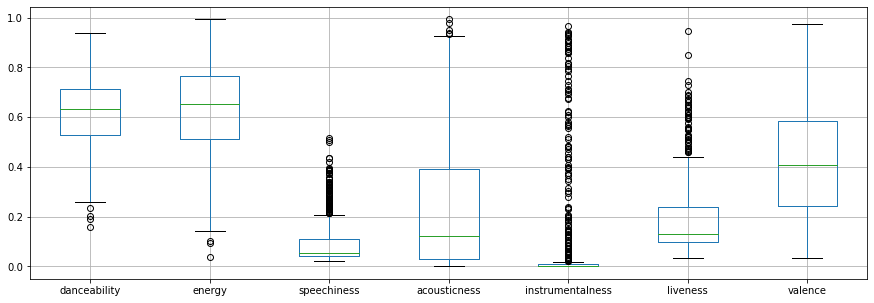

In [20]:
df_drop=df.drop(['analysis_url','uri','track_href','type','id','artist id'],axis=1)
fig = plt.figure(figsize=(15,5)) 
#quick look at audio features to consider for clustering
df_drop.boxplot(column = ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence'])

In [21]:
nas=pd.DataFrame(df_drop.isnull().sum().sort_values(ascending=False)/len(df_drop),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
genre_14,0.996951
genre_12,0.996951
genre_13,0.996951
genre_11,0.983232
genre_10,0.977134
artist_2,0.963415
genre_9,0.931402
genre_8,0.905488
genre_7,0.864329
artist_1,0.812500


In [24]:
df_drop1=df_drop.drop(['genre_14','genre_13','genre_12','genre_11','genre_10','genre_9','artist_2','genre_8','genre_7','genre_6','artist_1','genre_5','genre_4','genre_3','genre_2','genre_1'] 
                      ,axis=1)
df_drop1.columns

Index(['date saved', 'album name', 'is explicit', 'track name', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'artist_0', 'genre_0'],
      dtype='object')

**saved tracks from here will be used as a training set to recommend other tracks within the library to recommend. I will also add in K means clustering to see if three distinct sets of tracks can be identified to get a general idea of how the recommendations will be shaped**

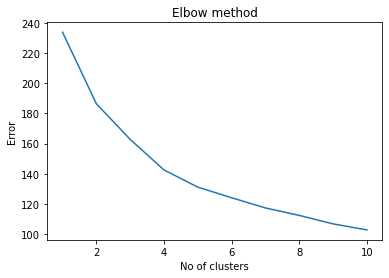

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

x = df_drop1.drop(['popularity','album name','date saved','is explicit','track name','artist_0','genre_0','duration_ms','key','mode','key']
                  , axis =1).values

min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Appears that 3 might be good numbers for k

In [78]:
kmeans = KMeans(n_clusters=3).fit(x)
kmeans.fit(x)
centers =kmeans.cluster_centers_

In [79]:
#new clusters based on true audio features
cluster_labels = kmeans.labels_
df_x = df.drop(['artist id','date saved','is explicit', 'artist_1', 'artist_2', 'genre_0', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8',
       'genre_9', 'genre_10', 'genre_11', 'genre_12', 'genre_13', 'genre_14','type','id','uri','track_href','analysis_url']
                  , axis =1)
df_x['Clusters']=cluster_labels

In [80]:
df_x.columns

Index(['album name', 'track name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'artist_0', 'Clusters'],
      dtype='object')

In [81]:
df_x.to_csv('working_data.csv',index=False)

**This concludes data wrangling**

In [ ]:
_=df_drop['popularity'].plot(kind='hist',bins = 25)

In [ ]:
_=df_drop['key'].plot(kind='hist',bins = 10)

In [ ]:
df_drop['duration_min'] = df_drop['duration_ms']/60000.0
_=df_drop['duration_min'].plot(kind='hist',bins = 30)

In [65]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 10).fit(x)

In [66]:
distances,indices = nbrs.kneighbors(x)
distances,indices

(array([[0.        , 0.16297274, 0.20763984, ..., 0.26112311, 0.26147868,
         0.26246573],
        [0.        , 0.23967105, 0.24541219, ..., 0.37709643, 0.38030898,
         0.38800576],
        [0.        , 0.14686573, 0.15362136, ..., 0.286037  , 0.29778274,
         0.30028321],
        ...,
        [0.        , 0.21416627, 0.23908045, ..., 0.28043687, 0.28480935,
         0.28610066],
        [0.        , 0.1938425 , 0.19523668, ..., 0.36209914, 0.37423524,
         0.3880117 ],
        [0.        , 0.24961536, 0.25699984, ..., 0.28407344, 0.30627592,
         0.30861463]]),
 array([[  0, 602, 637, ..., 182, 268, 131],
        [  1, 261, 165, ...,  91, 518, 508],
        [  2, 165,  91, ..., 261, 401, 518],
        ...,
        [653,  35, 419, ..., 171, 249, 624],
        [654, 341,  98, ..., 205, 314,  71],
        [655, 472,  46, ..., 328, 253, 239]], dtype=int64))

In [68]:
def get_index_from_name(name):
    return df_drop1[df_drop1['track name']==name].index.tolist()[0]

In [69]:
all_track_names = list(df['track name'].values)

In [70]:
def get_id_from_partial_name(partial):
    for name in all_track_names:
        if partial in name:
            print(name,all_track_names.index(name))

In [71]:
def print_similar_tracks(query = None,id = None):
    if id!=None:
        for i in indices[id][1:]:
            print(df.iloc[i]['artist_0'],"-",df.iloc[i]['track name'])
    if query!=None:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(df.iloc[id]['artist_0'],"-",df.iloc[id]['track name'])

In [72]:
get_id_from_partial_name('Perfect Way')

Perfect Way To Die 1


In [73]:
print_similar_tracks(id=5)

Worakls - Cloches
Martin Garrix - Proxy
Daft Punk - Instant Crush (feat. Julian Casablancas)
ODESZA - Memories That You Call (feat. Monsoonsiren) - ODESZA & Golden Features VIP Remix
Tycho - A Walk
Tei Shi - Bassically
Pierce Fulton - Kuaga - Original Mix
Dylan Sitts - Yeehaw Slap
Polo & Pan - Gengis - Edit
